# Movie Recommender with Python

#### DF Capstone Project
##### Author: Richard V

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from ast import literal_eval
from itertools import chain
import matplotlib.pyplot as plt
# Visualize clusters (2D PCA for simplicity)
from sklearn.decomposition import PCA
import seaborn as sns


### Preprocessing the dataset
Here I explore the dataset, handling any null values or errors within the dataset, look for any correlations between variables and formatting the dataset for modelling later on.

In [2]:
df = pd.read_csv("10kmovies.csv")

In [3]:
df.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum() #tagline,overview and release date have null values. Not interested in this so will drop them.

id                         0
title                      0
release_date              21
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  77
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2759
dtype: int64

In [6]:
df.drop(columns = ['release_date','overview','tagline'], inplace = True) # Dropping the columns will null values.

In [7]:
df.isnull().sum()

id                      0
title                   0
genres                  0
original_language       0
vote_average            0
vote_count              0
popularity              0
budget                  0
production_companies    0
revenue                 0
runtime                 0
dtype: int64

In [8]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [9]:
df.shape

(10000, 11)

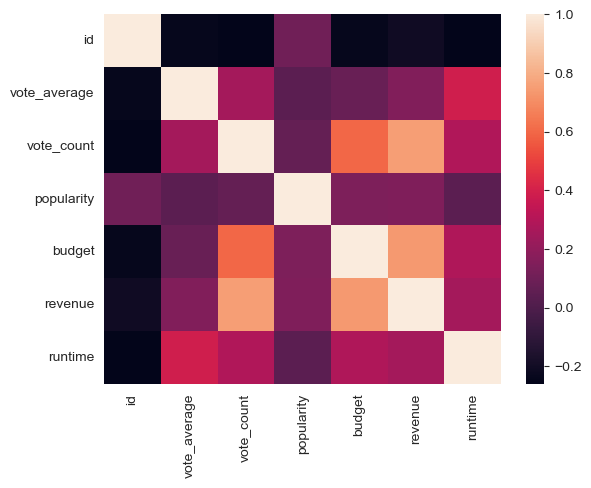

In [10]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [11]:
df.dtypes

id                        int64
title                    object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
dtype: object

In [12]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [13]:
action_movies = df[df['genres'].str.contains('Action')] # will output rows with action genre in them

In [14]:
action_movies = df[df['genres'] == 'Action']# will output rows with ONLY action genre in them. - there are none.

In [15]:
action_movies

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime


In [16]:
# Convert string representations to actual lists
df['genres'] = df['genres'].apply(literal_eval)


In [17]:
df.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,The Pope's Exorcist,"[Horror, Mystery, Thriller]",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,Ant-Man and the Wasp: Quantumania,"[Action, Adventure, Science Fiction]",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,The Super Mario Bros. Movie,"[Animation, Adventure, Family, Fantasy, Comedy]",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,Ghosted,"[Action, Comedy, Romance]",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,Shazam! Fury of the Gods,"[Action, Comedy, Fantasy, Adventure]",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130


In [18]:
# Flatten the lists and convert to Series
flattened_series = pd.Series(chain.from_iterable(df['genres']))

# Get unique genres
unique_genres = flattened_series.unique()

print(unique_genres)

['Horror' 'Mystery' 'Thriller' 'Action' 'Adventure' 'Science Fiction'
 'Animation' 'Family' 'Fantasy' 'Comedy' 'Romance' 'Drama' 'History' 'War'
 'Crime' 'Music' 'Western' 'TV Movie' 'Documentary']


In [19]:
len(unique_genres) #This will be my k cluster number

19

### Basic Movie Recommender

So the essential idea of my movie recommender is to generate a list of movies to the user based on their genre of interest.

In [20]:
#Create a user prompt.
print (f"Here are the list of genres. {unique_genres}")
goi = [] #genres of interest
str = ""
while True:
    user_genre = input("Please enter a genre of interest (or 'exit' to quit): ").capitalize().strip() # strip in case a user will enter white spaces by accident.

    if user_genre == 'Exit':
        print("Exiting the program.")

        break
    elif user_genre in unique_genres:
        print(f"Great choice! {user_genre} is a popular genre.")
        str += user_genre
        goi.append(user_genre)
    else:
        print("Sorry, that's not a valid genre. Please choose from the following genres:")
        print(', '.join(unique_genres))

Here are the list of genres. ['Horror' 'Mystery' 'Thriller' 'Action' 'Adventure' 'Science Fiction'
 'Animation' 'Family' 'Fantasy' 'Comedy' 'Romance' 'Drama' 'History' 'War'
 'Crime' 'Music' 'Western' 'TV Movie' 'Documentary']
Great choice! Romance is a popular genre.
Exiting the program.


In [21]:
# Convert list genres to string for TF-IDF vectorization later on but also to
df['genres_str'] = df['genres'].apply(', '.join)

In [22]:
goi #Our genres of interest from the user.

['Romance']

In [23]:
# df.groupby('vote_average')['title','genres','vote_average'].head(100).sort_values('vote_average',ascending=False) ## checking how to use sort_values.

In [24]:

# Create a boolean mask using str.contains for each genre
genre_masks = [df['genres_str'].str.contains(genre) for genre in goi]

# Combine the masks using logical OR (|)
combined_mask = pd.concat(genre_masks, axis=1).any(axis=1)

# Apply the combined mask to filter the DataFrame
filtered_df = df[combined_mask]
#
filter10 = filtered_df.head(10).sort_values('vote_average',ascending=False)

filter10['title'].reset_index(drop=True, inplace=True)
print(filter10['title'])

0        The Quintessential Quintuplets Movie
1                                     Ghosted
2                        Unhappily Ever After
3                                 Kiss, Kiss!
4              To Every You I've Loved Before
5                             Shotgun Wedding
6    The Forbidden Legend: Sex & Chopsticks 2
7                To Me, the One Who Loved You
8                          Beautiful Disaster
9                          The Little Mermaid
Name: title, dtype: object


In [25]:
###Filtering Function

def filter():
    #Create a user prompt.
    print (f"Here are the list of genres. {unique_genres}")
    goi = [] #genres of interest
    str = ""
    while True:
        user_genre = input("Please enter a genre of interest (or 'exit' to quit): ").capitalize().strip() # strip in case a user will enter white spaces by accident.

        if user_genre == 'Exit':
            print("Exiting the program.")

            break
        elif user_genre in unique_genres:
            print(f"Great choice! {user_genre} is a popular genre.")
            str += user_genre
            goi.append(user_genre)
        else:
            print("Sorry, that's not a valid genre. Please choose from the following genres:")
            print(', '.join(unique_genres))


    # Create a boolean mask using str.contains for each genre
    genre_masks = [df['genres_str'].str.contains(genre) for genre in goi]

    # Combine the masks using logical OR (|)
    combined_mask = pd.concat(genre_masks, axis=1).any(axis=1)

    # Apply the combined mask to filter the DataFrame
    filtered_df = df[combined_mask]
    #
    filter10 = filtered_df.head(10).sort_values('vote_average',ascending=False)

    filter10['title'].reset_index(drop=True, inplace=True)
    return print(filter10['title'])


In [26]:
filter()

Here are the list of genres. ['Horror' 'Mystery' 'Thriller' 'Action' 'Adventure' 'Science Fiction'
 'Animation' 'Family' 'Fantasy' 'Comedy' 'Romance' 'Drama' 'History' 'War'
 'Crime' 'Music' 'Western' 'TV Movie' 'Documentary']
Exiting the program.


ValueError: No objects to concatenate

### Applying Clustering
Now that the basic idea of the movie recommender is created. How can we make a better movie recommender? What if we wanted to find movies similar to other movies rather than by genre? What if we were to include all the features we have such as vote_average, popularity, profit (revenue - budget), runtime, and production companies with genre this time?

##### Revamping the dataframe

In [27]:
df1 = df.copy()

In [28]:
df1['genres'] = df1['genres'].apply(', '.join) # converting the lists of genres into strings.
df1['production_companies'] = df1['production_companies'].apply(literal_eval) #Converting the column of list of strings (json like)into actual (python) lists
df1['production_companies'] = df1['production_companies'].apply(', '.join) #converting the lists into strings

In [29]:
df1.head() #

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,genres_str
0,758323,The Pope's Exorcist,"Horror, Mystery, Thriller",English,7.4,619,5089.969,18000000,"Screen Gems, 2.0 Entertainment, Jesus & Mary, ...",65675816,103,"Horror, Mystery, Thriller"
1,640146,Ant-Man and the Wasp: Quantumania,"Action, Adventure, Science Fiction",English,6.6,2294,4665.438,200000000,"Marvel Studios, Kevin Feige Productions",464566092,125,"Action, Adventure, Science Fiction"
2,502356,The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy",English,7.5,1861,3935.550,100000000,"Universal Pictures, Illumination, Nintendo",1121048165,92,"Animation, Adventure, Family, Fantasy, Comedy"
3,868759,Ghosted,"Action, Comedy, Romance",English,7.2,652,2791.532,0,"Skydance Media, Apple Studios",0,120,"Action, Comedy, Romance"
4,594767,Shazam! Fury of the Gods,"Action, Comedy, Fantasy, Adventure",English,6.8,1510,2702.593,125000000,"New Line Cinema, The Safran Company, DC Films,...",133437105,130,"Action, Comedy, Fantasy, Adventure"


In [30]:
#making a net profit feature
df1['net_profit'] = df1['revenue'] - df1['budget']

In [31]:
df1.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,genres_str,net_profit
0,758323,The Pope's Exorcist,"Horror, Mystery, Thriller",English,7.4,619,5089.969,18000000,"Screen Gems, 2.0 Entertainment, Jesus & Mary, ...",65675816,103,"Horror, Mystery, Thriller",47675816
1,640146,Ant-Man and the Wasp: Quantumania,"Action, Adventure, Science Fiction",English,6.6,2294,4665.438,200000000,"Marvel Studios, Kevin Feige Productions",464566092,125,"Action, Adventure, Science Fiction",264566092
2,502356,The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy",English,7.5,1861,3935.550,100000000,"Universal Pictures, Illumination, Nintendo",1121048165,92,"Animation, Adventure, Family, Fantasy, Comedy",1021048165
3,868759,Ghosted,"Action, Comedy, Romance",English,7.2,652,2791.532,0,"Skydance Media, Apple Studios",0,120,"Action, Comedy, Romance",0
4,594767,Shazam! Fury of the Gods,"Action, Comedy, Fantasy, Adventure",English,6.8,1510,2702.593,125000000,"New Line Cinema, The Safran Company, DC Films,...",133437105,130,"Action, Comedy, Fantasy, Adventure",8437105


In [32]:
#removing unnecessary columns
df1.drop(columns = ['genres_str', 'budget','revenue'], inplace = True)


In [33]:
df1['tags'] = df1['genres'] + df1['original_language'] + df1['production_companies']

In [34]:
df1.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,production_companies,runtime,net_profit,tags
0,758323,The Pope's Exorcist,"Horror, Mystery, Thriller",English,7.4,619,5089.969,"Screen Gems, 2.0 Entertainment, Jesus & Mary, ...",103,47675816,"Horror, Mystery, ThrillerEnglishScreen Gems, 2..."
1,640146,Ant-Man and the Wasp: Quantumania,"Action, Adventure, Science Fiction",English,6.6,2294,4665.438,"Marvel Studios, Kevin Feige Productions",125,264566092,"Action, Adventure, Science FictionEnglishMarve..."
2,502356,The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy",English,7.5,1861,3935.550,"Universal Pictures, Illumination, Nintendo",92,1021048165,"Animation, Adventure, Family, Fantasy, ComedyE..."
3,868759,Ghosted,"Action, Comedy, Romance",English,7.2,652,2791.532,"Skydance Media, Apple Studios",120,0,"Action, Comedy, RomanceEnglishSkydance Media, ..."
4,594767,Shazam! Fury of the Gods,"Action, Comedy, Fantasy, Adventure",English,6.8,1510,2702.593,"New Line Cinema, The Safran Company, DC Films,...",130,8437105,"Action, Comedy, Fantasy, AdventureEnglishNew L..."


In [35]:
import re

def separate_words_by_capitals(input_string):
    # Use regular expression to split words by two consecutive capital letters
    words = re.findall('[A-Z]{2}(?=[a-z])|[A-Z][a-z]*', input_string)
    return ', '.join(words)

In [36]:
df1['tags'] = df1['tags'].apply(separate_words_by_capitals)

In [37]:
df1.head()

,id,title,genres,original_language,vote_average,vote_count,popularity,production_companies,runtime,net_profit,tags
0,758323,The Pope's Exorcist,"Horror, Mystery, Thriller",English,7.4,619,5089.969,"Screen Gems, 2.0 Entertainment, Jesus & Mary, ...",103,47675816,"Horror, Mystery, Thriller, English, Screen, Ge..."
1,640146,Ant-Man and the Wasp: Quantumania,"Action, Adventure, Science Fiction",English,6.6,2294,4665.438,"Marvel Studios, Kevin Feige Productions",125,264566092,"Action, Adventure, Science, Fiction, English, ..."
2,502356,The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy",English,7.5,1861,3935.550,"Universal Pictures, Illumination, Nintendo",92,1021048165,"Animation, Adventure, Family, Fantasy, Comedy,..."
3,868759,Ghosted,"Action, Comedy, Romance",English,7.2,652,2791.532,"Skydance Media, Apple Studios",120,0,"Action, Comedy, Romance, English, Skydance, Me..."
4,594767,Shazam! Fury of the Gods,"Action, Comedy, Fantasy, Adventure",English,6.8,1510,2702.593,"New Line Cinema, The Safran Company, DC Films,...",130,8437105,"Action, Comedy, Fantasy, Adventure, English, N..."


In [38]:
df1.drop(columns=['genres','production_companies','original_language'], inplace=True)

In [39]:
df1.head()

,id,title,vote_average,vote_count,popularity,runtime,net_profit,tags
0,758323,The Pope's Exorcist,7.4,619,5089.969,103,47675816,"Horror, Mystery, Thriller, English, Screen, Ge..."
1,640146,Ant-Man and the Wasp: Quantumania,6.6,2294,4665.438,125,264566092,"Action, Adventure, Science, Fiction, English, ..."
2,502356,The Super Mario Bros. Movie,7.5,1861,3935.550,92,1021048165,"Animation, Adventure, Family, Fantasy, Comedy,..."
3,868759,Ghosted,7.2,652,2791.532,120,0,"Action, Comedy, Romance, English, Skydance, Me..."
4,594767,Shazam! Fury of the Gods,6.8,1510,2702.593,130,8437105,"Action, Comedy, Fantasy, Adventure, English, N..."


In [40]:
df1['title'] = df1['title'].str.strip()## getting rid of any unnecssary white spaces

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
# Extract all words from the 'tags' column
all_words = ' '.join(df1['tags']).split()

# Create a set of unique words
unique_words_set = set(all_words)

# Calculate the total number of unique words
total_unique_words = len(unique_words_set)

print(total_unique_words) # set as our max features

8420


In [43]:

from sklearn.feature_extraction.text import CountVectorizer


In [44]:
cv=CountVectorizer(max_features=8420,stop_words='english')
vector=cv.fit_transform(df1['tags']).toarray()
vector.shape

(10000, 7590)

In [45]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
similarity=cosine_similarity(vector)
similarity

array([[1.        , 0.1754116 , 0.0877058 , ..., 0.39223227, 0.        ,
        0.09245003],
       [0.1754116 , 1.        , 0.2       , ..., 0.1118034 , 0.        ,
        0.10540926],
       [0.0877058 , 0.2       , 1.        , ..., 0.1118034 , 0.        ,
        0.10540926],
       ...,
       [0.39223227, 0.1118034 , 0.1118034 , ..., 1.        , 0.        ,
        0.11785113],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.19245009],
       [0.09245003, 0.10540926, 0.10540926, ..., 0.11785113, 0.19245009,
        1.        ]])

In [47]:
def recommend(movie):
    index=df1[df1['title']==movie].index[0]
    distances=sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])
    for i in distances[1:5]: #1 - 5 is the similarity. 0 being the "movie" recommended e.g. Aladdin below. Can also use the furthest by changing index to -5, -1 for example to get last 5.
        print(df1.iloc[i[0]].title)


In [48]:
recommend('The Pope\'s Exorcist')

Slender Man
Insidious: Chapter 3
When a Stranger Calls
Unfriended


In [49]:
def recommender():
    movie = input("Please enter a movie: ")
    return recommend(movie)

In [50]:
df1.head()

,id,title,vote_average,vote_count,popularity,runtime,net_profit,tags
0,758323,The Pope's Exorcist,7.4,619,5089.969,103,47675816,"Horror, Mystery, Thriller, English, Screen, Ge..."
1,640146,Ant-Man and the Wasp: Quantumania,6.6,2294,4665.438,125,264566092,"Action, Adventure, Science, Fiction, English, ..."
2,502356,The Super Mario Bros. Movie,7.5,1861,3935.550,92,1021048165,"Animation, Adventure, Family, Fantasy, Comedy,..."
3,868759,Ghosted,7.2,652,2791.532,120,0,"Action, Comedy, Romance, English, Skydance, Me..."
4,594767,Shazam! Fury of the Gods,6.8,1510,2702.593,130,8437105,"Action, Comedy, Fantasy, Adventure, English, N..."


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
# Select features for clustering
selected_features = ['vote_average', 'vote_count', 'popularity', 'runtime', 'net_profit']
data_subset = df1[selected_features]

# Normalize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Apply K-means clustering
num_clusters = 6  # Adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df1['cluster'] = kmeans.fit_predict(data_scaled)

# Text vectorization for movie tags
cv = CountVectorizer(max_features=8420, stop_words='english')
tags_tfidf = cv.fit_transform(df1['tags'])

# Calculate cosine similarity between tag vectors
similarity = cosine_similarity(tags_tfidf)

# Define a function to recommend movies based on clustering and cosine similarity
def recommend_movies(movie_title):
    index = df1[df1['title'] == movie_title].index[0]
    cluster = df1.loc[index, 'cluster']

    # Find movies in the same cluster
    similar_movies = df1[df1['cluster'] == cluster]

    # Calculate cosine similarity scores for the user input movie
    movie_similarity_scores = similarity[index]

    # Sort movies based on a combination of cluster membership and cosine similarity
    similar_movies['similarity_score'] = movie_similarity_scores[similar_movies.index]
    recommended_movies = similar_movies.sort_values(by=['cluster', 'similarity_score'], ascending=[True, False])

    return recommended_movies[['title', 'vote_average', 'vote_count', 'popularity', 'runtime', 'net_profit']]

# # User inputs a movie title
# user_input_movie = "Avatar"
#
# # Get movie recommendations for the user input movie
# recommendations = recommend_movies(user_input_movie)
# print(recommendations.tail(10))  # Print the top recommended movies

C:\Users\Richard\Anaconda june 2023\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
df1.head()

,id,title,vote_average,vote_count,popularity,runtime,net_profit,tags,cluster
0,758323,The Pope's Exorcist,7.4,619,5089.969,103,47675816,"Horror, Mystery, Thriller, English, Screen, Ge...",3
1,640146,Ant-Man and the Wasp: Quantumania,6.6,2294,4665.438,125,264566092,"Action, Adventure, Science, Fiction, English, ...",3
2,502356,The Super Mario Bros. Movie,7.5,1861,3935.550,92,1021048165,"Animation, Adventure, Family, Fantasy, Comedy,...",3
3,868759,Ghosted,7.2,652,2791.532,120,0,"Action, Comedy, Romance, English, Skydance, Me...",3
4,594767,Shazam! Fury of the Gods,6.8,1510,2702.593,130,8437105,"Action, Comedy, Fantasy, Adventure, English, N...",3


In [54]:
def recommender1():
    inp = input("Please enter a movie:").title()
    return recommend_movies(inp).head(10) #Remove the first entry as it will be the users movie suggestion.


In [55]:
recommender1()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [56]:
# !pip install fuzzywuzzy
# !pip install python-Levenshtein

In [57]:
import re
from fuzzywuzzy import fuzz

In [60]:
def preprocess_title(title):
    # Convert to lowercase and remove punctuation
    normalized_title = re.sub(r'[^\w\s]', '', title).lower()
    return normalized_title

def find_best_match(user_input, movie_titles):
    user_input = preprocess_title(user_input)
    best_match = max(movie_titles, key=lambda x: fuzz.ratio(user_input, x)) #Fuzzy wuzzy things
    return best_match

def recommender2():
    inp = input("Please enter a movie:").title()

    # Find the best matching movie title from your dataset
    movie_titles = df1['title'] #.tolist()
    best_matching_title = find_best_match(inp, movie_titles)

    # Get recommendations based on the best matching title
    return recommend_movies(best_matching_title).head(10)[1:]# Remove the first entry as it will be the user's movie suggestion.

In [61]:
recommender2()

C:\Users\Richard\AppData\Local\Temp\ipykernel_9908\3284944462.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_movies['similarity_score'] = movie_similarity_scores[similar_movies.index]


,title,vote_average,vote_count,popularity,runtime,net_profit
766,Barbie,0.0,0,64.366,0,-100000000
5586,Wonka,0.0,0,14.106,0,-125000000
1150,Meg 2: The Trench,0.0,0,48.793,0,0
4437,Fool's Paradise,0.0,0,27.822,99,0
3476,Blue Beetle,0.0,0,22.946,0,-120000000
980,Aquaman and the Lost Kingdom,0.0,0,50.278,0,0
3771,Redfoot,0.0,0,23.601,15,-3500
4492,Hannah Gadsby: Something Special,0.0,0,27.586,74,0
184,The Flash,0.0,0,123.659,0,-220000000
4275,BlackBerry,0.0,0,28.487,121,0


# The least recommended movie

In [ ]:


def lrecommender():
    inp = input("Please enter a movie:").title()

    # Find the best matching movie title from your dataset
    movie_titles = df1['title'] #.tolist()
    best_matching_title = find_best_match(inp, movie_titles)

    # Get recommendations based on the best matching title
    return recommend_movies(best_matching_title).tail(10)

In [ ]:
lrecommender()

### Main Issues with this model

The user input needs to be accurate. If the movie title doesn't match a movie in the dataset, it won't run, so if the user types it in wrong by adding an extra space it wont run.

Going further with this point, the user's movie may not be in the dataset, so it wouldn't work with their movie. Dataset needs to be larger. perhaps move onto the 20M dataset.

The prompt doesn't take into consideration multiple movies, just one movie.


### Evaluating the performance of this model

Evaluating the performance of unsupervised learning models are different to supervised learning cases. You can't use traditional metrics such as Accuracy to determine the models performance as there is no target. For my model, I used K-Means clustering

#Things to investigate
#precision at k
#recall at k
#mean average precision at k

#Precision at K


#look at the vectorizor and change the number of features
#silhouette coefficient to evaluate the performance of K


In [ ]:
#Looking at K
#Silhouete Method


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []
for k in range(2, 30):  # Try different k values
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_subset)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_subset, labels)
    silhouette_scores.append(silhouette_avg)
# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 30))
plt.grid(True)
plt.show()

In [ ]:
best_k = np.argmax(silhouette_scores) + 2  # Adding 2 since k loop starts from 2
#bubbles split.

In [ ]:
print(best_k)

In [ ]:
# Calculate WCSS for different k values
wcss = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_subset)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 30), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(2, 30))
plt.grid(True)
plt.show()

# Filter

In [ ]:
print(unique_genres)

In [ ]:
filter()



# Recommender using text

In [ ]:
recommender()

# Recommender K-Means

In [ ]:
recommender1()

# Recommender  Fuzz Wuzz

In [ ]:
recommender2()

# LRecommender

In [ ]:
lrecommender()